# Analysing airbnb data 

### 1: Exploratory questions

In [3]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/edit?usp=sharing"
csv_url = url.replace("/edit?usp=sharing", "/export?format=csv")

# Load the sheet data into a DataFrame
df = pd.read_csv(csv_url, index_col=0)

# Display the DataFrame
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


#### Load in Data

One can use the link to get the sheet in, but you have to specify the export format in the end of the url.

In [4]:
import pandas as pd

# Base URL for the Google Sheets file
base_url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=csv&gid="

# List of `gid`s, sheet names, and their corresponding countries
sheets_info = [
    {"gid": "1813557111", "sheet_name": "amsterdam_weekdays", "country": "Netherlands"},
    {"gid": "1671143450", "sheet_name": "amsterdam_weekends", "country": "Netherlands"},
    {"gid": "1474041232", "sheet_name": "athens_weekdays", "country": "Greece"},
    {"gid": "993539767", "sheet_name": "athens_weekends", "country": "Greece"},
    {"gid": "295085637", "sheet_name": "berlin_weekends", "country": "Germany"},
    {"gid": "305266500", "sheet_name": "berlin_weekdays", "country": "Germany"},
    {"gid": "1009970054", "sheet_name": "barcelona_weekdays", "country": "Spain"},
    {"gid": "1739828988", "sheet_name": "barcelona_weekends", "country": "Spain"},
    {"gid": "1438277999", "sheet_name": "budapest_weekdays", "country": "Hungary"},
    {"gid": "1326018133", "sheet_name": "budapest_weekends", "country": "Hungary"},
    {"gid": "82202766", "sheet_name": "lisbon_weekdays", "country": "Portugal"},
    {"gid": "1355881051", "sheet_name": "lisbon_weekends", "country": "Portugal"},
    {"gid": "9179440", "sheet_name": "london_weekdays", "country": "England"},
    {"gid": "58206735", "sheet_name": "london_weekends", "country": "England"},
    {"gid": "1452107999", "sheet_name": "paris_weekdays", "country": "France"},
    {"gid": "1803477090", "sheet_name": "paris_weekends", "country": "France"},
    {"gid": "1127044053", "sheet_name": "rome_weekdays", "country": "Italy"},
    {"gid": "1238155247", "sheet_name": "rome_weekends", "country": "Italy"},
    {"gid": "671930913", "sheet_name": "vienna_weekdays", "country": "Austria"},
    {"gid": "1950822222", "sheet_name": "vienna_weekends", "country": "Austria"}
]

# List to store all DataFrames
df_list = []

# Retrieve data from each sheet
for sheet in sheets_info:
    # Construct the specific URL for the current sheet
    csv_url = f"{base_url}{sheet['gid']}"
    
    # Load data into a DataFrame
    sheet_df = pd.read_csv(csv_url)
    
    # Delete the first column by index
    sheet_df.drop(sheet_df.columns[0], axis=1, inplace=True)
    
    # Rename 'realSum' to 'price'
    sheet_df.rename(columns={'realSum': 'price'}, inplace=True)
    
    # Extract city and day type from the sheet name
    city, day_type = sheet['sheet_name'].split('_')
    
    # Add the `city`, `day_type`, and `country` columns
    sheet_df['city'] = city.capitalize()  # Capitalize to keep city names consistent
    sheet_df['day_type'] = 'Weekday' if day_type == 'weekdays' else 'Weekend'
    sheet_df['country'] = sheet['country']  # Assign country from sheets_info
    
    # Append the DataFrame to the list
    df_list.append(sheet_df)

# Concatenate all DataFrames into a single, large DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
combined_df


,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Weekend,Austria
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Weekend,Austria
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,...,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,Vienna,Weekend,Austria
51705,301.054157,Private room,False,True,2,False,0,0,10,87,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Weekend,Austria


#### Explanation:

Specified the gid (for each sheet) and then iterated through all of them and concatinated them. 
Also delete first row, specify country and city, change the name of realSum to price.

In [5]:
import pandas as pd

# Base URL for the Google Sheets file
base_url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=csv&gid="

# List of `gid`s, sheet names, and their corresponding countries
sheets_info = [
    {"gid": "1813557111", "sheet_name": "amsterdam_weekdays", "country": "Netherlands"},
    {"gid": "1671143450", "sheet_name": "amsterdam_weekends", "country": "Netherlands"},
    {"gid": "1474041232", "sheet_name": "athens_weekdays", "country": "Greece"},
    {"gid": "993539767", "sheet_name": "athens_weekends", "country": "Greece"},
    {"gid": "295085637", "sheet_name": "berlin_weekends", "country": "Germany"},
    {"gid": "305266500", "sheet_name": "berlin_weekdays", "country": "Germany"},
    {"gid": "1009970054", "sheet_name": "barcelona_weekdays", "country": "Spain"},
    {"gid": "1739828988", "sheet_name": "barcelona_weekends", "country": "Spain"},
    {"gid": "1438277999", "sheet_name": "budapest_weekdays", "country": "Hungary"},
    {"gid": "1326018133", "sheet_name": "budapest_weekends", "country": "Hungary"},
    {"gid": "82202766", "sheet_name": "lisbon_weekdays", "country": "Portugal"},
    {"gid": "1355881051", "sheet_name": "lisbon_weekends", "country": "Portugal"},
    {"gid": "9179440", "sheet_name": "london_weekdays", "country": "England"},
    {"gid": "58206735", "sheet_name": "london_weekends", "country": "England"},
    {"gid": "1452107999", "sheet_name": "paris_weekdays", "country": "France"},
    {"gid": "1803477090", "sheet_name": "paris_weekends", "country": "France"},
    {"gid": "1127044053", "sheet_name": "rome_weekdays", "country": "Italy"},
    {"gid": "1238155247", "sheet_name": "rome_weekends", "country": "Italy"},
    {"gid": "671930913", "sheet_name": "vienna_weekdays", "country": "Austria"},
    {"gid": "1950822222", "sheet_name": "vienna_weekends", "country": "Austria"}
]

# List to store all DataFrames
df_list = []

# Retrieve data from each sheet
for sheet in sheets_info:
    # Construct the specific URL for the current sheet
    csv_url = f"{base_url}{sheet['gid']}"
    
    # Load data into a DataFrame
    sheet_df = pd.read_csv(csv_url)
    
    # Delete the first column by index
    sheet_df.drop(sheet_df.columns[0], axis=1, inplace=True)
    
    # Rename 'realSum' to 'price'
    sheet_df.rename(columns={'realSum': 'price'}, inplace=True)
    
    # Extract city and day type from the sheet name
    city, day_type = sheet['sheet_name'].split('_')
    
    # Add the `city`, `day_type`, and `country` columns
    sheet_df['city'] = city.capitalize()  # Capitalize to keep city names consistent
    sheet_df['day_type'] = 'Weekday' if day_type == 'weekdays' else 'Weekend'
    sheet_df['country'] = sheet['country']  # Assign country from sheets_info
    
    # Append the DataFrame to the list
    df_list.append(sheet_df)

# Concatenate all DataFrames into a single, large DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
combined_df


,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekday,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekday,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekday,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekday,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekday,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,Weekend,Austria
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,Weekend,Austria
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,...,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,Vienna,Weekend,Austria
51705,301.054157,Private room,False,True,2,False,0,0,10,87,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,Weekend,Austria


#### How many listings are in each city in total and also per type of day?


In [6]:
# Total listings per city
listings_per_city = combined_df.groupby('city').size()
print("Total listings per city:")
print(listings_per_city)

# Listings per city and day type
listings_per_city_day_type = combined_df.groupby(['city', 'day_type']).size()
print("\nListings per city and day type:")
print(listings_per_city_day_type)


Total listings per city:
city
Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Lisbon       5763
London       9993
Paris        6688
Rome         9027
Vienna       3537
dtype: int64

Listings per city and day type:
city       day_type
Amsterdam  Weekday     1103
           Weekend      977
Athens     Weekday     2653
           Weekend     2627
Barcelona  Weekday     1555
           Weekend     1278
Berlin     Weekday     1284
           Weekend     1200
Budapest   Weekday     2074
           Weekend     1948
Lisbon     Weekday     2857
           Weekend     2906
London     Weekday     4614
           Weekend     5379
Paris      Weekday     3130
           Weekend     3558
Rome       Weekday     4492
           Weekend     4535
Vienna     Weekday     1738
           Weekend     1799
dtype: int64


#### Which city has the biggest proportion of superhosts?


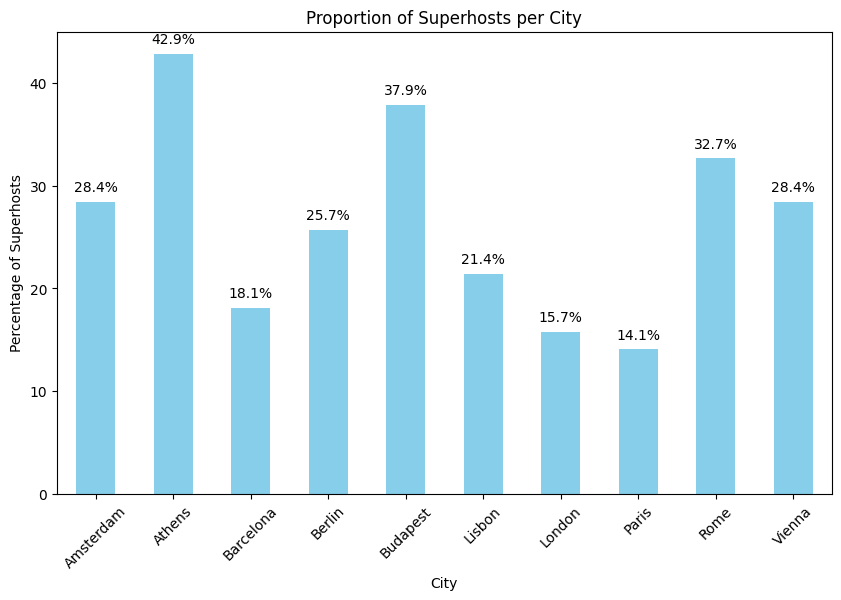

In [7]:
import matplotlib.pyplot as plt

# Calculate the total listings and the superhost listings per city
total_listings_per_city = combined_df.groupby('city').size()
superhost_listings_per_city = combined_df[combined_df['host_is_superhost'] == True].groupby('city').size()

# Calculate the proportion of superhosts
superhost_proportion = (superhost_listings_per_city / total_listings_per_city) * 100

# Plot the proportion of superhosts per city
plt.figure(figsize=(10, 6))
superhost_proportion.plot(kind='bar', color='skyblue')
plt.title("Proportion of Superhosts per City")
plt.xlabel("City")
plt.ylabel("Percentage of Superhosts")
plt.xticks(rotation=45)

# Add labels above bars
for index, value in enumerate(superhost_proportion):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.show()


#### Which cities have listings with more than four rooms?


In [11]:
# Filter listings with more than four bedrooms
listings_with_more_than_four_bedrooms = combined_df[combined_df['bedrooms'] > 4]

# Get unique cities with listings that have more than four bedrooms
cities_with_large_listings = listings_with_more_than_four_bedrooms['city'].unique()

print("Cities with listings that have more than four bedrooms:")
print(cities_with_large_listings)


Cities with listings that have more than four bedrooms:
['Amsterdam' 'Berlin' 'Barcelona' 'Lisbon' 'London' 'Paris' 'Rome']


#### Which city has the most entire home/apt type listings?


In [12]:
# Assuming there is a column named 'room_type' that indicates the type of listing

# Filter for listings that are 'Entire home/apt'
entire_home_listings = combined_df[combined_df['room_type'] == 'Entire home/apt']

# Count the number of entire home listings per city
entire_home_count_per_city = entire_home_listings['city'].value_counts()

# Get the city with the most 'Entire home/apt' listings
city_with_most_entire_homes = entire_home_count_per_city.idxmax()
max_entire_home_count = entire_home_count_per_city.max()

print(f"The city with the most 'Entire home/apt' listings is {city_with_most_entire_homes} with {max_entire_home_count} listings.")


The city with the most 'Entire home/apt' listings is Rome with 5561 listings.


#### Are ratings typically high across listings, or is there a wide variation?


In [17]:
# Filter out rows with missing values in 'guest_satisfaction_overall'
filtered_df = combined_df.dropna(subset=['guest_satisfaction_overall'])

# Calculate variance and standard deviation of ratings
rating_variance = filtered_df['guest_satisfaction_overall'].var()
rating_std_dev = filtered_df['guest_satisfaction_overall'].std()

print(f"Variance of guest satisfaction ratings: {rating_variance:.2f}")
print(f"Standard deviation of guest satisfaction ratings: {rating_std_dev:.2f}")

Variance of guest satisfaction ratings: 80.02
Standard deviation of guest satisfaction ratings: 8.95


Since the evaluation is measured from 0-100, a stdv. of 8.95 is pretty high, so ratings vary. 

#### How does person_capacity vary across listings? What is the most common capacity of listings?


In [19]:
# Calculate the most common capacity
most_common_capacity = combined_df['person_capacity'].mode()[0]

print(f"The most common person capacity across listings is: {most_common_capacity}")

The most common person capacity across listings is: 2


 #### Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.


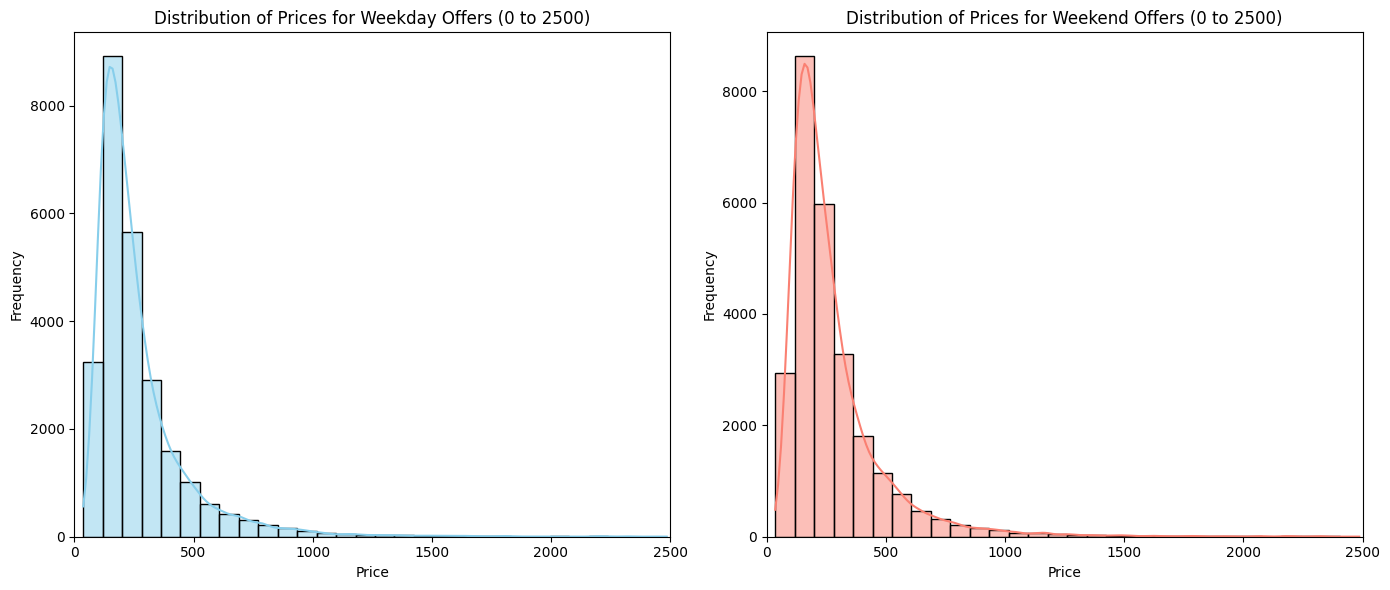

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter prices to be within the range 0 to 2500 for better visualization
weekday_prices = combined_df[(combined_df['day_type'] == 'Weekday') & (combined_df['price'] <= 2500)]['price']
weekend_prices = combined_df[(combined_df['day_type'] == 'Weekend') & (combined_df['price'] <= 2500)]['price']

# Plot histograms and KDE plots for the filtered price range
plt.figure(figsize=(14, 6))

# Weekday prices
plt.subplot(1, 2, 1)
sns.histplot(weekday_prices, kde=True, color='skyblue', bins=30)
plt.title("Distribution of Prices for Weekday Offers (0 to 2500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2500)

# Weekend prices
plt.subplot(1, 2, 2)
sns.histplot(weekend_prices, kde=True, color='salmon', bins=30)
plt.title("Distribution of Prices for Weekend Offers (0 to 2500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2500)

plt.tight_layout()
plt.show()


Data looks pretty skewed. Maybe a log transformation helps.

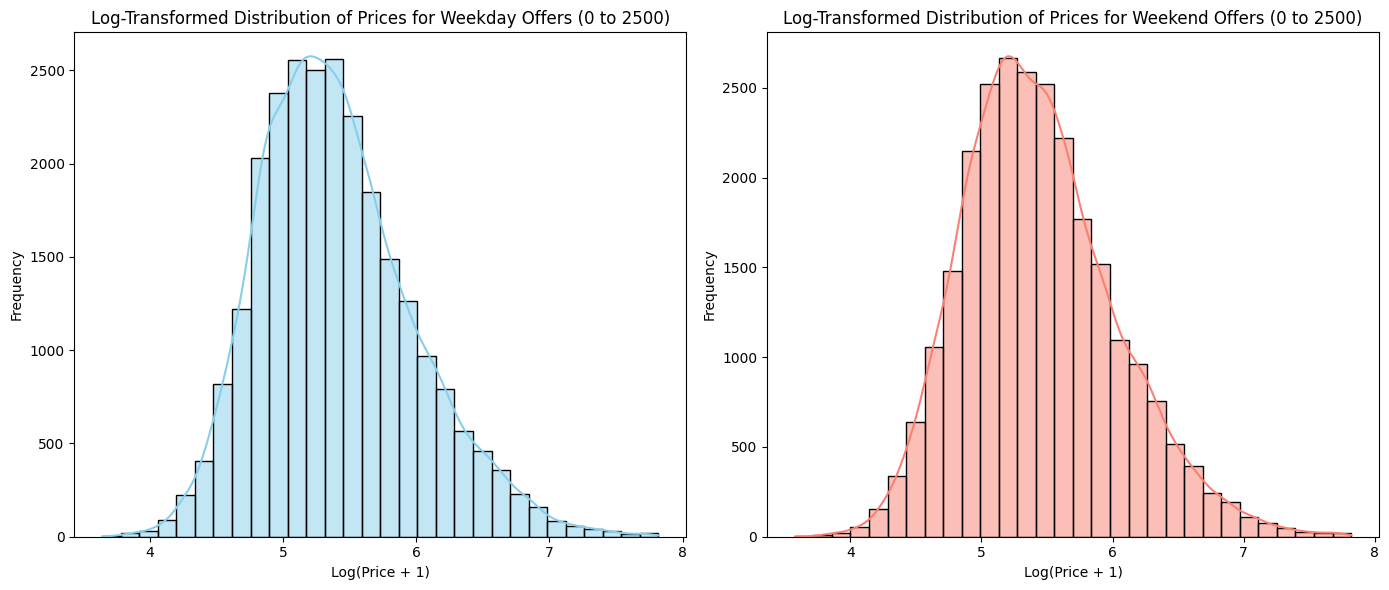

In [26]:

# Filter prices to be within the range 0 to 2500 for better visualization
weekday_prices = combined_df[(combined_df['day_type'] == 'Weekday') & (combined_df['price'] <= 2500)]['price']
weekend_prices = combined_df[(combined_df['day_type'] == 'Weekend') & (combined_df['price'] <= 2500)]['price']

# Apply log transformation to prices (log(1 + Price) to handle zero values)
weekday_prices_log = np.log1p(weekday_prices)
weekend_prices_log = np.log1p(weekend_prices)

# Plot transformed distributions
plt.figure(figsize=(14, 6))

# Log-transformed Weekday prices
plt.subplot(1, 2, 1)
sns.histplot(weekday_prices_log, kde=True, color='skyblue', bins=30)
plt.title("Log-Transformed Distribution of Prices for Weekday Offers (0 to 2500)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")

# Log-transformed Weekend prices
plt.subplot(1, 2, 2)
sns.histplot(weekend_prices_log, kde=True, color='salmon', bins=30)
plt.title("Log-Transformed Distribution of Prices for Weekend Offers (0 to 2500)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Plot the distribution of guest_satisfaction_overall ratings. 


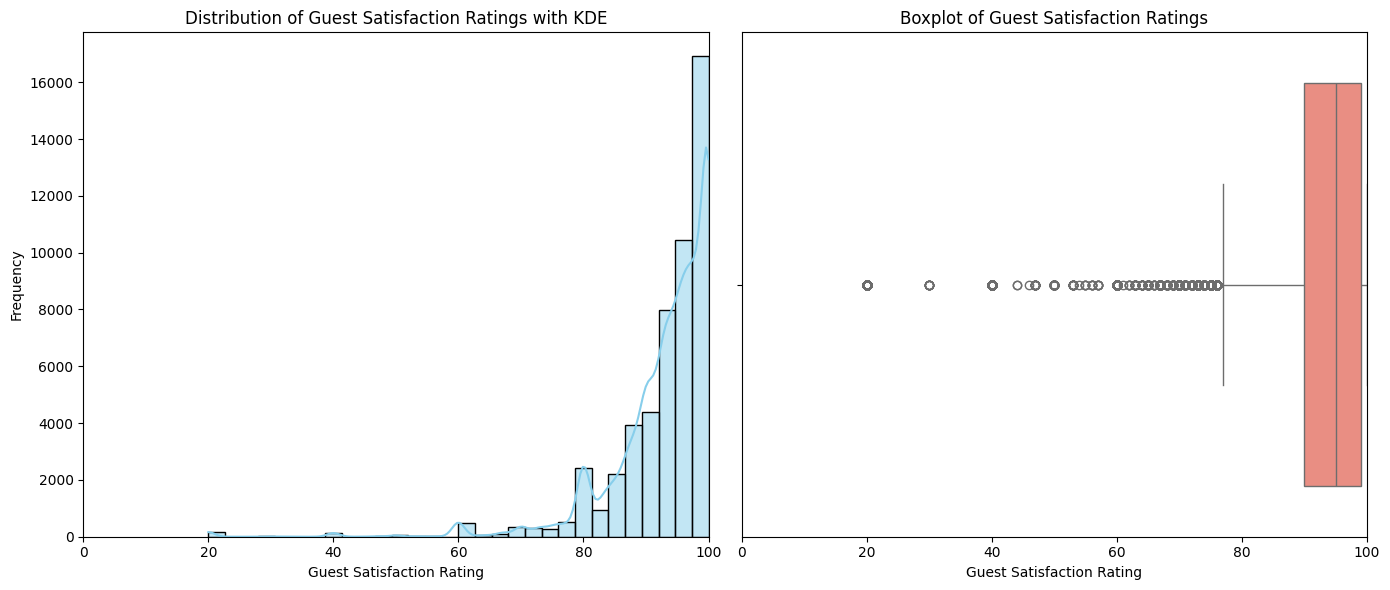

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots side by side
plt.figure(figsize=(14, 6))

# First plot: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(combined_df['guest_satisfaction_overall'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Guest Satisfaction Ratings with KDE")
plt.xlabel("Guest Satisfaction Rating")
plt.ylabel("Frequency")
plt.xlim(0, 100)  # Assuming ratings are on a scale from 0 to 100

# Second plot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df['guest_satisfaction_overall'], color='salmon')
plt.title("Boxplot of Guest Satisfaction Ratings")
plt.xlabel("Guest Satisfaction Rating")
plt.xlim(0, 100)  # Assuming ratings are on a scale from 0 to 100

plt.tight_layout()
plt.show()


#### Examine the distribution of cleanliness_rating.

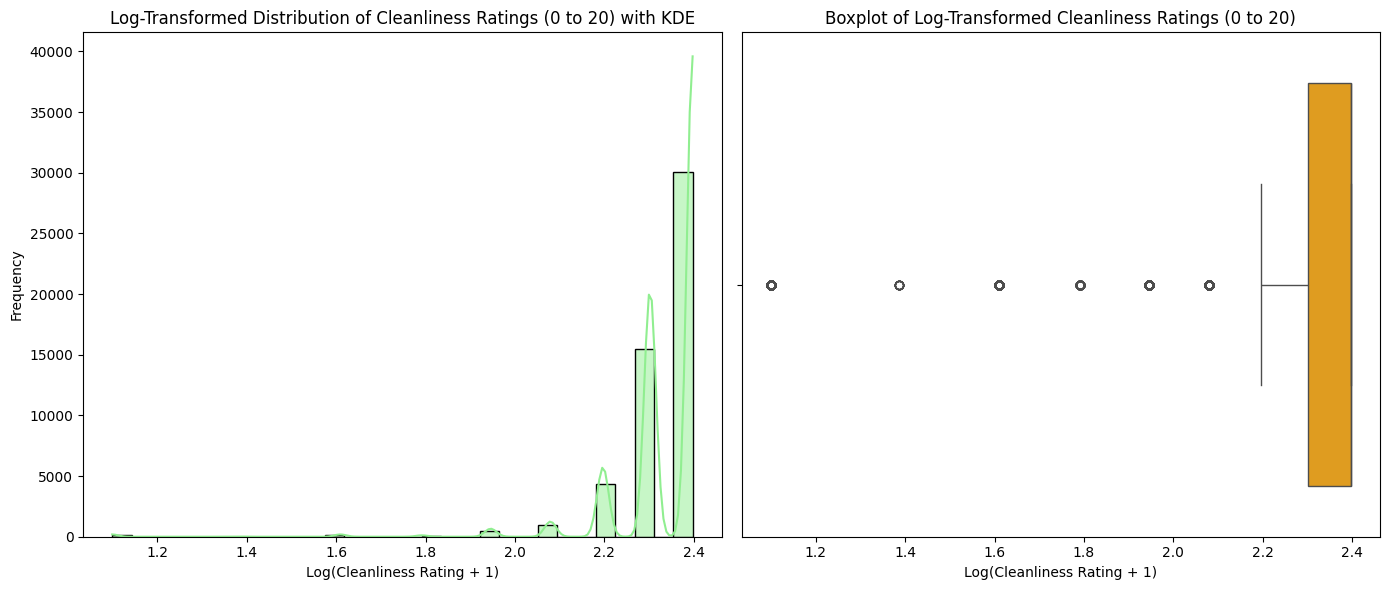

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter cleanliness ratings to be within the range 0 to 20
cleanliness_filtered = combined_df[(combined_df['cleanliness_rating'] <= 20)]['cleanliness_rating']

# Apply log transformation to filtered cleanliness ratings
cleanliness_log = np.log1p(cleanliness_filtered)

# Set up the figure with two subplots side by side
plt.figure(figsize=(14, 6))

# First plot: Histogram with KDE for log-transformed cleanliness rating (filtered data)
plt.subplot(1, 2, 1)
sns.histplot(cleanliness_log, kde=True, color='lightgreen', bins=30)
plt.title("Log-Transformed Distribution of Cleanliness Ratings (0 to 20) with KDE")
plt.xlabel("Log(Cleanliness Rating + 1)")
plt.ylabel("Frequency")

# Second plot: Boxplot for log-transformed cleanliness rating (filtered data)
plt.subplot(1, 2, 2)
sns.boxplot(x=cleanliness_log, color='orange')
plt.title("Boxplot of Log-Transformed Cleanliness Ratings (0 to 20)")
plt.xlabel("Log(Cleanliness Rating + 1)")

plt.tight_layout()
plt.show()


### 2: Questions for testing